# Variational Inference

## Motivation

Much of Variational Inference is about finding bounds on functions. So called 'global' methods, seek a bound on the entire function, whilst 'local' methods seek to approximate it at a point.

Each has their advantages, and which one to use is normally dictated by the function in question.

By finding bounds, we can approximate a complicated to evaluate function, with a much easier one.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

As a trivial example, let's imagine that we have a quadratic equation that in reality has some very long and complicated coefficients. Imagine that it's complex for us to figure them out exactly, but we are happy to use an approximate evaluation of the function. 

Because we don't know the coefficients, we can't actually evaluate our function at any point - this is why we use bounds. We can't do standard things like evaluate a few points and do an interpolation or approximate our function with a polynomial, because we can't evaluate it anywhere. These few examples are somewhat contrived, but for many problems, we can derive a bound on the function, without actually every knowing the function explicitly. But we will come onto this later.

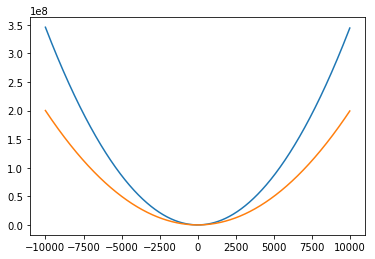

In [57]:
x = np.arange(-10000, 10000,20)
y = 3.4562869421*x**2 + 0.12353263*x + 19 # our true 'complex' function
alpha = 2.0
y2 = alpha*x**2  #our simple approximation
plt.plot(x,y)
plt.plot(x,y2)

Our approximation, $y = 2 X^{2}$, is a global lower bound, so it is always less than or equal to the true function.

In [58]:
all(y2<y)

True

Perhaps this is fine for some cases, but if we look closer, the functions are never equal. At $X=0$ our bound has a value of 0, whereas the true function has a value of 19.

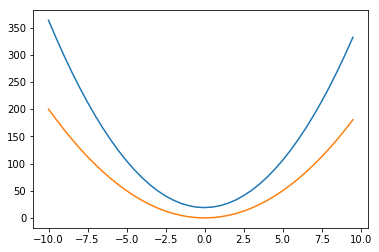

In [59]:
x = np.arange(-10, 10,0.5)
y = 3.4562869421*x**2 + 0.12353263*x + 19 # our true 'complex' function
alpha = 2.0
y2 = alpha*x**2 #our simple approximation
plt.plot(x,y)
plt.plot(x,y2)

Maybe in our application, we actually only need to evaluate in the range of -2 to +2. It would probably make sense to make the error here minimal, rather than being overly concern about our approximation being a lower bound at some very large or small distance away.

For example, we could use $y=4X^{2} + 16.5$, and this would give us a pretty good approximation in the range of -2 to +2

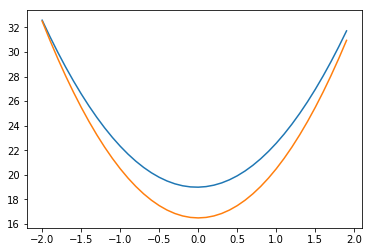

In [60]:
x = np.arange(-2, 2,0.1)
y = 3.4562869421*x**2 + 0.12353263*x + 19 # our true 'complex' function
alpha = 4
gamma = 16.5
y2 = alpha*x**2 + gamma #our simple approximation
plt.plot(x,y)
plt.plot(x,y2)

In [61]:
all(y2<y)

True

But this is only a local bound, as it is a lower bound only in this region. If we zoom out a bit, we see the full picture.

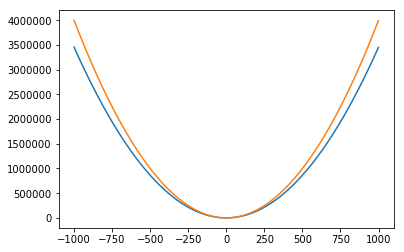

In [62]:
x = np.arange(-1000, 1000,1)
y = 3.4562869421*x**2 + 0.12353263*x + 19 # our true 'complex' function
alpha = 4
gamma = 16.5
y2 = alpha*x**2 + gamma #our simple approximation
plt.plot(x,y)
plt.plot(x,y2)

## Problem in context

The most common place we see Variational Inference is computing posterior distributions in Bayesian models. Recall Bayes' Theroem:

$P(Z \mid X) = \frac{P(X,Z)}{\int_{Z}{P(X,Z) dZ}}$

Computing the denominator of this fraction is sometimes very, very hard. For example, if Z is multidemensional, and the distributions are not conjugate, there are very limited ways to compute this integral.

Let's take the simplifying assumption that X and Z are independent. This gives us the simplifying assumption:

$\int_{Z}{P(X,Z) dZ} = \int_{Z}{P(X)P(Z) dZ} $

Obviously if we knew this in practice, we could simply find P(X) by factorising the joint distribution, however the important point here is to show how complex computing this integral is if we don't know an anlytical simplification. Let's say $P(Z)$ is a multivariate standard Gaussian. 

In [64]:
from scipy.stats import multivariate_normal 

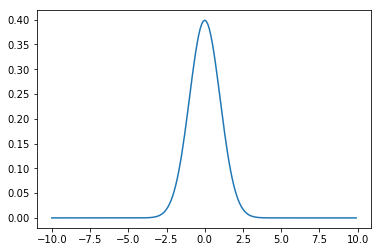

In [66]:
x = np.arange(-10, 10, 0.1)
y = multivariate_normal.pdf(x, mean=np.zeros(1), cov=np.ones(1))
plt.plot(x,y)

In 1D this is a simple numeric integral.

In [88]:
import time

x = np.arange(-100, 100, 1)
dx = 1.0
area = 0
start = time.time()
for i in range(len(x)-1):
    h1 = multivariate_normal.pdf(x[i], mean=np.zeros(1), cov=np.ones(1))
    h2 = multivariate_normal.pdf(x[i+1], mean=np.zeros(1), cov=np.ones(1))
    av_h = 0.5*(h1+h2)
    area += av_h * dx
print(area, " - took:", time.time()-start)

1.00000000535  - took: 0.07561182975769043


Even in 2D, this starts to become harder

In [89]:
dx = 1.0
area = 0
start = time.time()
for i in range(len(x)-1):
    for j in range(len(x)-1):
        h1 = multivariate_normal.pdf(np.array([x[i], x[j]]), mean=np.zeros(2), cov=np.eye(2))
        h2 = multivariate_normal.pdf(np.array([x[i+1], x[j+1]]), mean=np.zeros(2), cov=np.eye(2))
        h3 = multivariate_normal.pdf(np.array([x[i], x[j+1]]), mean=np.zeros(2), cov=np.eye(2))
        h4 = multivariate_normal.pdf(np.array([x[i+1], x[j]]), mean=np.zeros(2), cov=np.eye(2))
        av_h = 0.25*(h1+h2+h3+h4)
        area += av_h * dx**2
print(area, " - took:", time.time()-start)

1.0000000107  - took: 16.11290979385376


In [92]:
x = np.arange(-50, 50, 1) # half the range because it takes so long!!
dx = 1.0
area = 0
start = time.time()
for i in range(len(x)-1):
    for j in range(len(x)-1):
        for k in range(len(x)-1):
            h1 = multivariate_normal.pdf(np.array([x[i], x[j], x[k]]), mean=np.zeros(3), cov=np.eye(3))
            h2 = multivariate_normal.pdf(np.array([x[i+1], x[j+1], x[k]]), mean=np.zeros(3), cov=np.eye(3))
            h3 = multivariate_normal.pdf(np.array([x[i], x[j+1], x[k]]), mean=np.zeros(3), cov=np.eye(3))
            h4 = multivariate_normal.pdf(np.array([x[i+1], x[j], x[k]]), mean=np.zeros(3), cov=np.eye(3))
            h5 = multivariate_normal.pdf(np.array([x[i], x[j], x[k+1]]), mean=np.zeros(3), cov=np.eye(3))
            h6 = multivariate_normal.pdf(np.array([x[i+1], x[j+1], x[k+1]]), mean=np.zeros(3), cov=np.eye(3))
            h7 = multivariate_normal.pdf(np.array([x[i], x[j+1], x[k+1]]), mean=np.zeros(3), cov=np.eye(3))
            h8 = multivariate_normal.pdf(np.array([x[i+1], x[j], x[k+1]]), mean=np.zeros(3), cov=np.eye(3))
            av_h = (1/8)*(h1+h2+h3+h4+h5 + h6 + h7 + h8)
            area += av_h * dx**3
print(area, " - took:", time.time()-start)

1.00000001605  - took: 889.6852066516876


The reason this scales so badly is because of the curse of dimensionality - as our space becomes bigger, so does the shapes of which we need to compute the are. In 1d, we have to do ~ 200 evaluations, in 2d ~ 40,000 and in 3d (if we did the same x as 1 and 2d) ~ 8 million. 

Let's not forget that this is a simple case too - an independant mulivariate gaussian with known mean and variance. This means, I only have to integrate over a small portion of the real line (-100 to 100 is ample). In general, we don't neccesarily know this - in high dimensions with a non analytical joint, we might have to integrate over a very large range to ensure we capture all the mass of Z. Consider the example where Z is actually a mixture of many gaussians, with means equally spaced between -1e6 and + 1e6, giving us a 3d integral requiring 2e12 evaluations - a near impossible feat, and we are still only in 3D. Move this to 5 dimensions and it becomes 2e30 evaluations!!